In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import dolfin
import mshr
import numpy as np
import scipy.integrate as integrate
from fenics import *

ModuleNotFoundError: No module named &#39;mshr&#39;

# DIMENSIONS

In [63]:
# defining dicts
mesh_dict = {
    'L_mot' : .01,
    'l_mot' : .003,
    'L_1' : .0045,
    'l_1': .005,
    'L_2' : .007,
    'l_2' : .015,
    'delta_vert_12' : .005,
    'L_vacuum' : .1,
    'l_vacuum': .05,
    'mesh_resolution' : 100,
    'refine_mesh' : True,
}

phi_dict = {
    'Phi_top_mot' : 0,
    'Phi_bord_mot': 'N',
    'Phi_electrode1' :100,
    'Phi_inter_electrode':'N',
    'Phi_electrode2':150,
    'Phi_sup_vacuum':'N',
    'Phi_inf_vacuum':'N',
}

physics_consts_dict = {
    'rhoelec': 0,
    'PERMITTIVITY' : 8.54e-12,
}


# Mesh
We use functions defined in the *mesh_utils.py* module.

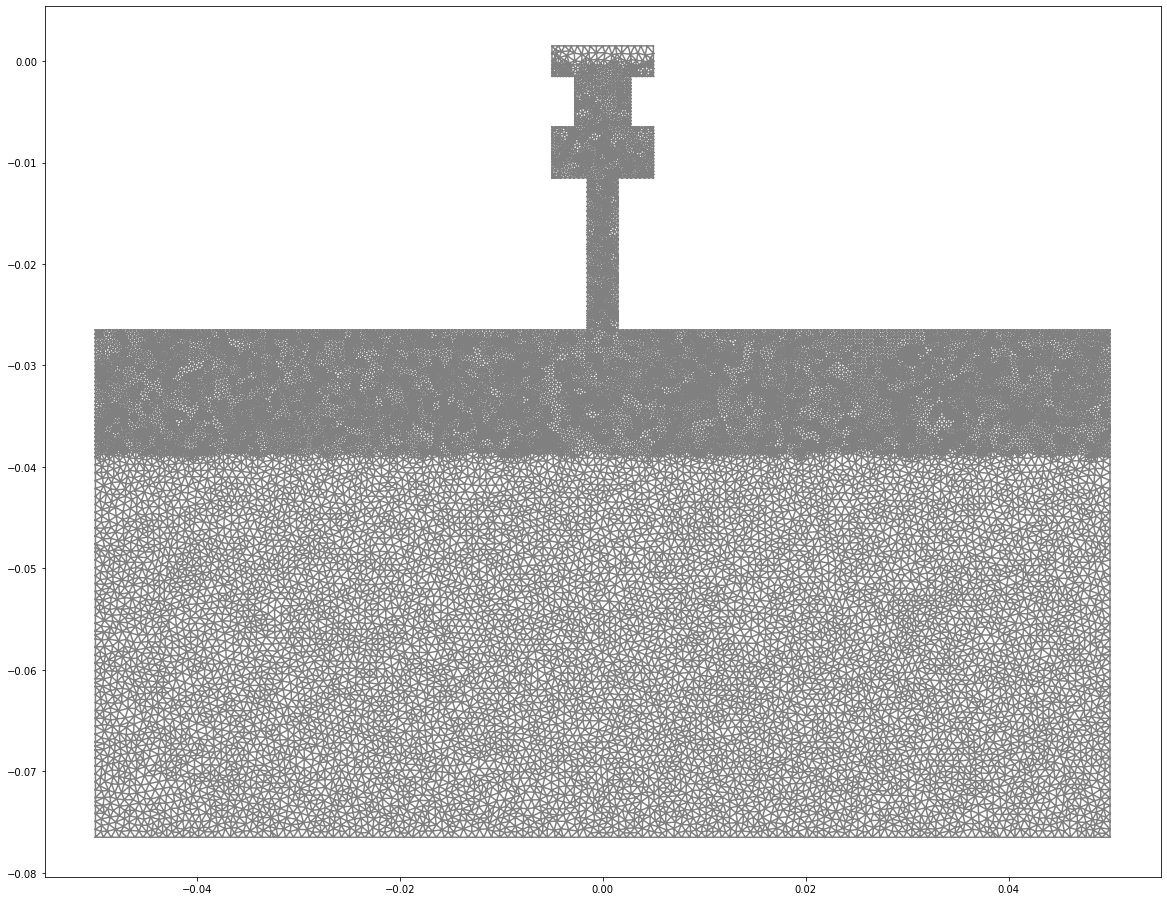

In [67]:
mesh, segments_list = get_mesh(mesh_dict)

plt.figure(figsize=(20,20))
plot(mesh)
plt.show()

# E computation

We use functions defined in the *physics_utils.py* module.

In [70]:
Phi, E = get_VandE(mesh_dict, phi_dict, physics_consts_dict)
Ex, Ey = E.split(deepcopy=True)
NE=sqrt(dot(E,E))

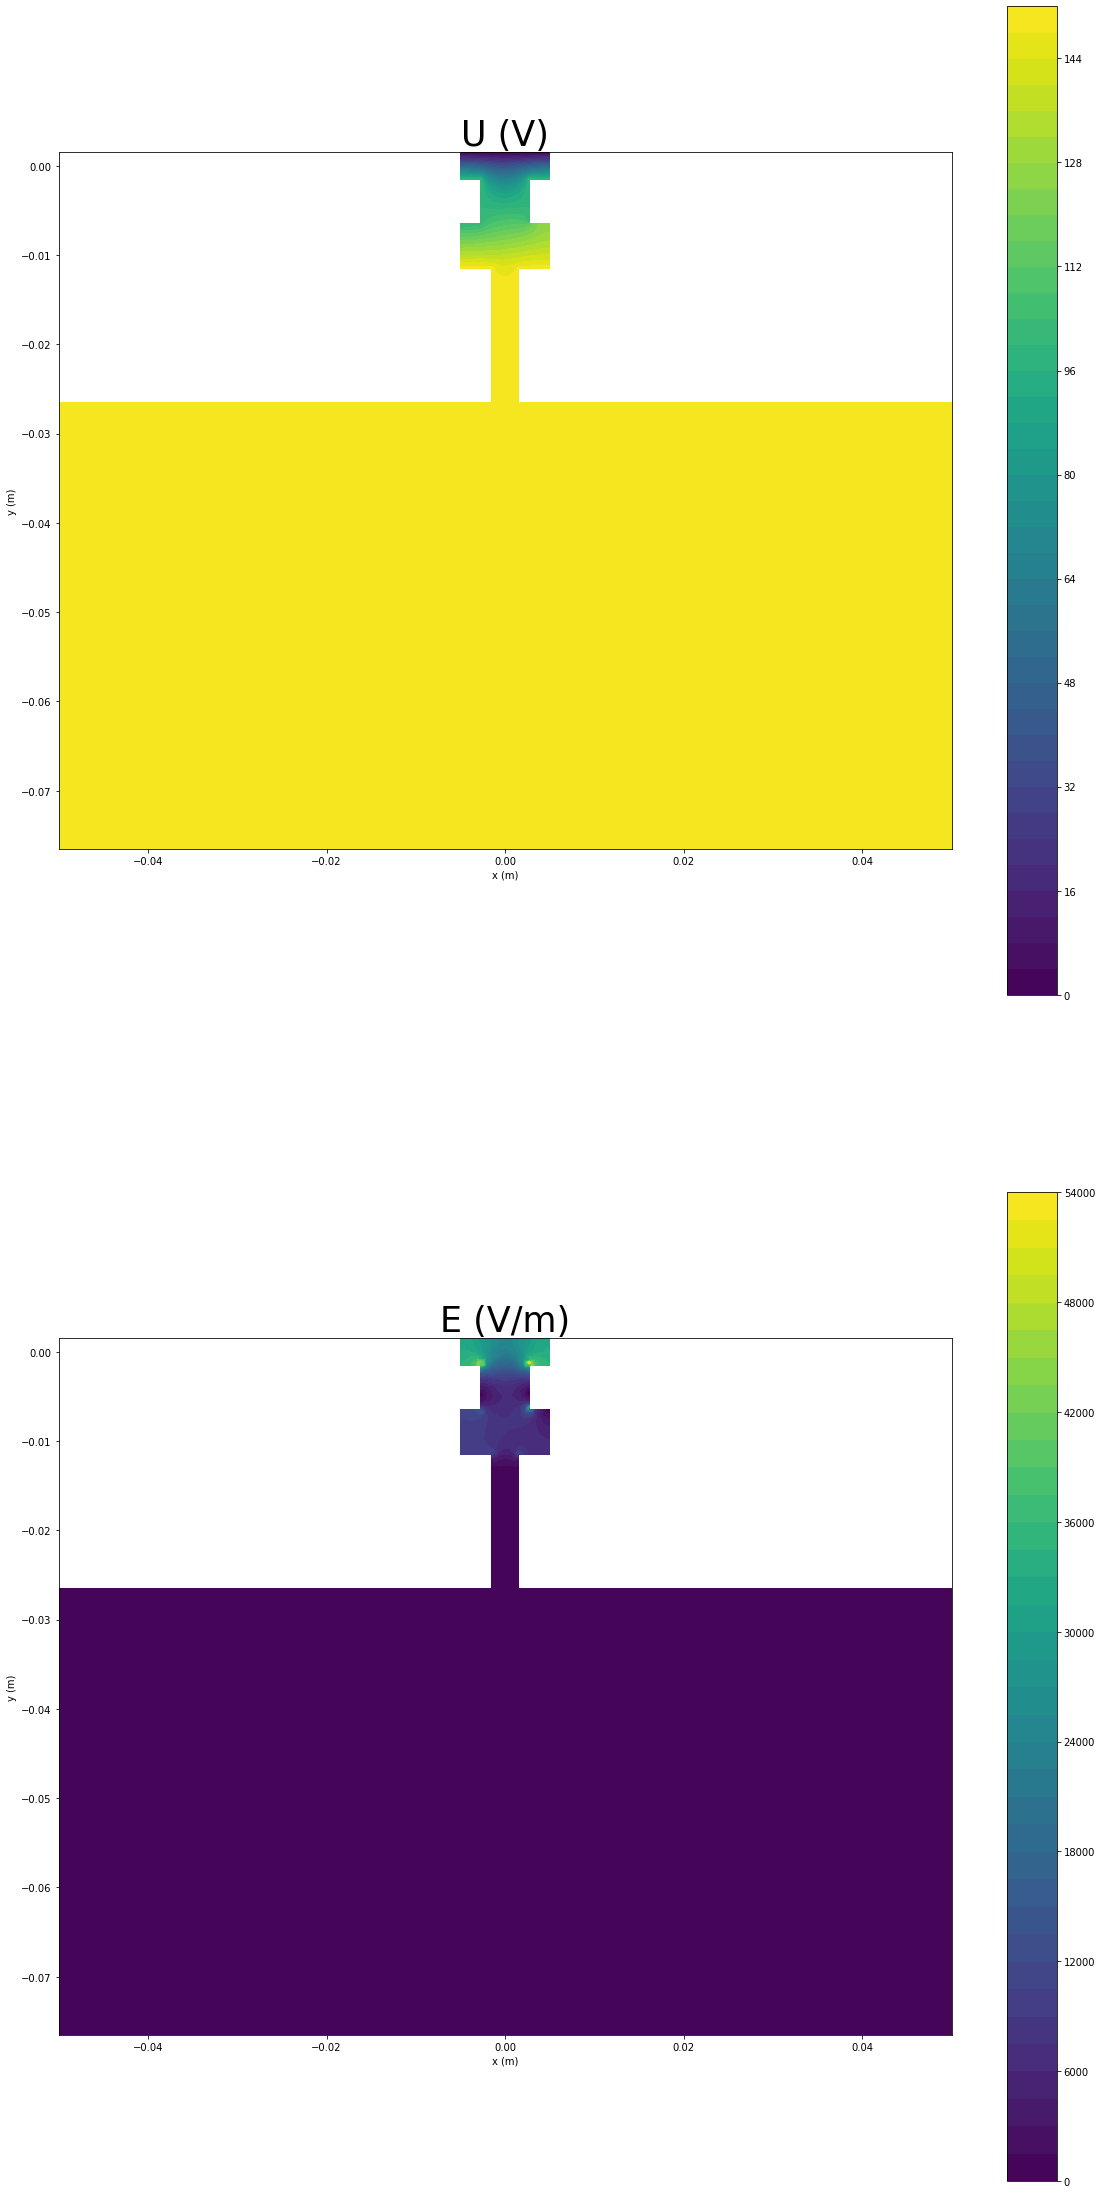

In [71]:
# TODO: we could add a function to handle the plotting of such functions.
plt.figure(figsize=(20,40))

plt.subplot(2,1,1)
fig=plot(Phi)
plt.title('U (V)', size=35)
plt.xlabel('x (m)',size=10)
plt.ylabel('y (m)',size=10)
fig.set_cmap("viridis") 
plt.colorbar(fig)

plt.subplot(2,1,2)
fig=plot(NE)
plt.title('E (V/m)', size=35)
plt.xlabel('x (m)',size=10)
plt.ylabel('y (m)',size=10)
fig.set_cmap("viridis") 
plt.colorbar(fig)

plt.show()

# CALCUL DE TRAJECTOIRE

In [77]:
integration_parameters_dict = {
    'tmax' : 10,
    'dt' : .0001,
    't' : 0
}

particule_dict = {
    'm_part' : 1,
    'q_part' : -1e-16,
    'x0': 0,
    'y0': 0, 
    'vx0': .1, 
    'vy0': .01
}
m_part = particule_dict['m_part']
q_part = particule_dict['q_part']

# what to do with this function ?
def f(Y,t): #Y=[x,y,vx,vy]
    """
    Renvoie la dérivée de Y en y (en faisant un bilan des forces notamment) pr être entré dans RK4
    """
    vx=Y[2]
    vy=Y[3]
    if zone.inside(Point(Y[0],Y[1])):
        ax = (1/m_part) * q_part * Ex(Y[0], Y[1])
        ay = (1/m_part) * q_part * Ey(Y[0], Y[1])
    else :
        ax = 0  #utile si les ki st hors du mesh
        ay = 0
    return [vx, vy, ax, ay]

liste_x, liste_y, liste_vx, liste_vy, N_impact = compute_trajectory(integration_parameters_dict, particule_dict, f)

In [ ]:
plt.figure(figsize=(20,20))
fig=plot(NE)
plt.plot(liste_x,liste_y,linestyle='-',color='r')
plt.scatter(liste_x[0],liste_y[0],color='r')
plt.scatter(liste_x[-1],liste_y[-1],color='r')
plt.title('E (V/m)', size=35)
plt.xlabel('x (m)',size=10)
plt.ylabel('y (m)',size=10)
fig.set_cmap("viridis") 
plt.colorbar(fig)

plt.show()

In [ ]:
print('N_impact=',N_impact)
print('alpha=',np.arctan(-liste_vx[-1]/liste_vy[-1]))